In [1]:
import pickle
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
stopWords = set(stopwords.words('english'))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
f = open('VOICE_tokenized.p', 'rb')
VOICE_toks = pickle.load(f)
f.close()

f = open('BNC_tokenized.p', 'rb')
BNC_toks = pickle.load(f)
f.close()

f = open('VOICE_participant_info.p', 'rb')
participants = pickle.load(f)
f.close()

# Comparing Native and Non-native Speakers (VOICE and BNC)

In [4]:
#Takes a conversation dictionary and a list of languages. Returns a dictionary of 
#conversations (subcorpus) containing only utterances from participants whose L1 is 
#included in the list of languages.

def speech_by_L1(conversation_dict, lang_list):
    new_dict = {}
    for conversation in conversation_dict.keys():
        utterances = {}
        
        for pair in conversation_dict[conversation]:    
            speaker = pair[1]
            #print(conversation_dict[conversation][pair])

            
            #print(participants[speaker]['L1'][0])
            if(participants[speaker]['L1'][0] in lang_list):
                utterances[pair] = conversation_dict[conversation][pair]
            

        new_dict[conversation] = utterances    

    return new_dict

In [9]:
#Takes a dictionary of conversations from a corpus, and returns a list of bigrams.
def get_bigrams(dictionary):
    bigrams = []
    for file in dictionary:
        for key in dictionary[file]:
            pairs = list(nltk.bigrams(dictionary[file][key]))
            bigrams.extend(pairs)
    return bigrams

In [10]:
#Takes a list of bigrams, returns dictionary whose keys are bigrams containing 
#duplicate words (e.g ('i', 'i',), ('the', 'the') and whose values are the 
#frequencies of each bigram

def repeated_words(bigrams):
    repeated = {}
    for b in bigrams:
        if(b[0] == b[1]):
            if(b not in repeated):
                repeated[b] = 1
            else:
                repeated[b] += 1
    return repeated

In [11]:
#Creating subcorpora from the VOICE corpus: one for participants with Germanic L1s, one for
#participants with Romance L1s, and one for participants with Slavic L1s
lang_classifications = {'germanic': ['ger', 'dut', 'swe', 'dan', 'nor', 'ice'],
                        'romance': ['por', 'spa', 'ita', 'fre', 'cat', 'rum'],
                        'slavic': ['rus', 'ukr', 'pol', 'bul', 'mac', 'cze', 'bos', 'slo', 'slv']}

germanic_toks = speech_by_L1(VOICE_toks, lang_classifications['germanic'])
romance_toks = speech_by_L1(VOICE_toks, lang_classifications['romance'])
slavic_toks = speech_by_L1(VOICE_toks, lang_classifications['slavic'])

In [12]:
#Get lists of bigrams for VOICE and BNC, in addition to the three sub-corpora
VOICE_bigrams = get_bigrams(VOICE_toks)
BNC_bigrams = get_bigrams(BNC_toks)
germanic_bigrams = get_bigrams(germanic_toks)
romance_bigrams = get_bigrams(romance_toks)
slavic_bigrams = get_bigrams(slavic_toks)

## Bigrams

### Hesitations and Repeated Words

In [18]:
BNC_repeated_words = [b for b in BNC_bigrams if b[0] == b[1]]
VOICE_repeated_words = [b for b in VOICE_bigrams if b[0] == b[1]]
germanic_repeated_words = [b for b in germanic_bigrams if b[0] == b[1]]
romance_repeated_words = [b for b in romance_bigrams if b[0] == b[1]]
slavic_repeated_words = [b for b in slavic_bigrams if b[0] == b[1]]

In [49]:
repeated_df = pd.DataFrame(index = ['repeated words'], columns = ['L1=English(BNC)', 'All(VOICE)', 'L1=Germanic(VOICE)', 'L1=Romance(VOICE)', 'L1=Slavic(VOICE)'])
repeated_df['L1=English(BNC)']['repeated words'] = len(BNC_repeated_words)/len(BNC_bigrams)
repeated_df['All(VOICE)']['repeated words'] = len(VOICE_repeated_words)/len(VOICE_bigrams)
repeated_df['L1=Germanic(VOICE)']['repeated words'] = len(germanic_repeated_words)/len(germanic_bigrams)
repeated_df['L1=Romance(VOICE)']['repeated words'] = len(romance_repeated_words)/len(romance_bigrams)
repeated_df['L1=Slavic(VOICE)']['repeated words'] = len(slavic_repeated_words)/len(slavic_bigrams)

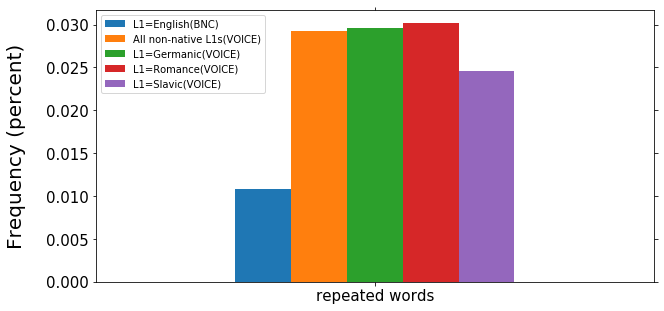

,L1=English(BNC),All(VOICE),L1=Germanic(VOICE),L1=Romance(VOICE),L1=Slavic(VOICE)
repeated words,0.0108283,0.0292122,0.0296259,0.030192,0.0246243


In [50]:
repeated_df.plot(kind='bar', figsize=(10,5))
plt.tick_params(axis = 'both', reset=True, labelsize=15)
plt.legend(prop={'size':20})
bar_width = 0.4
L=plt.legend()
L.get_texts()[1].set_text('All non-native L1s(VOICE)')
plt.ylabel("Frequency (percent)", fontsize= 20, labelpad = 20)
plt.show()

repeated_df

### Contractions

In [55]:
BNC_contractions = [b for b in BNC_bigrams if "'" in b[1]]
VOICE_contractions = [b for b in VOICE_bigrams if "'" in b[1]]
germanic_contractions = [b for b in germanic_bigrams if "'" in b[1]]
romance_contractions = [b for b in romance_bigrams if "'" in b[1]]
slavic_contractions = [b for b in slavic_bigrams if "'" in b[1]]

In [57]:
contraction_proportion_df = pd.DataFrame(index = ['contraction proportions'], columns = ['L1=English(BNC)', 'All(VOICE)', 'L1=Germanic(VOICE)', 'L1=Romance(VOICE)', 'L1=Slavic(VOICE)'])

contraction_proportion_df['L1=English(BNC)']['contraction proportions'] = len(BNC_contractions)/len(BNC_bigrams)
contraction_proportion_df['All(VOICE)']['contraction proportions'] = len(VOICE_contractions)/len(VOICE_bigrams)
contraction_proportion_df['L1=Germanic(VOICE)']['contraction proportions'] = len(germanic_contractions)/len(germanic_bigrams)
contraction_proportion_df['L1=Romance(VOICE)']['contraction proportions'] = len(romance_contractions)/len(romance_bigrams)
contraction_proportion_df['L1=Slavic(VOICE)']['contraction proportions'] = len(slavic_contractions)/len(slavic_bigrams)

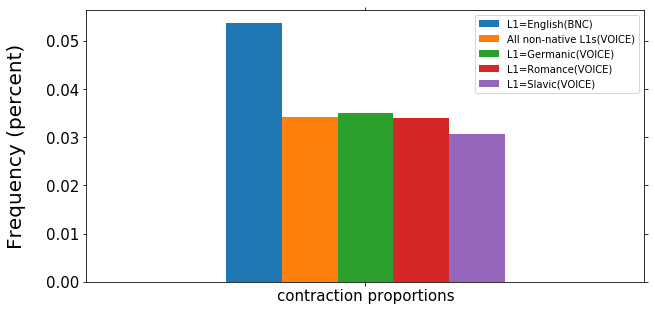

,L1=English(BNC),All(VOICE),L1=Germanic(VOICE),L1=Romance(VOICE),L1=Slavic(VOICE)
contraction proportions,0.0536744,0.0341021,0.0350262,0.0340637,0.0307484


In [60]:
contraction_proportion_df.plot(kind='bar', figsize=(10,5))
plt.tick_params(axis = 'both', reset=True, labelsize=15)
plt.legend(prop={'size':20})
bar_width = 0.4
L=plt.legend()
L.get_texts()[1].set_text('All non-native L1s(VOICE)')
plt.ylabel("Frequency (percent)", fontsize= 20, labelpad = 20)
plt.show()

contraction_proportion_df

In [61]:
BNC_contractions_frequencies = nltk.FreqDist(BNC_contractions)
germanic_contractions_frequencies = nltk.FreqDist(germanic_contractions)
romance_contractions_frequencies = nltk.FreqDist(romance_contractions)
slavic_contractions_frequencies = nltk.FreqDist(slavic_contractions)

In [78]:
BNC_top_15 = BNC_contractions_frequencies.most_common(15)
BNC_top_15 = [b[0] for b in BNC_top_15]
bigrams_df = pd.DataFrame(index = BNC_top_15, columns = ['English(BNC)', 'Germanic(VOICE)', 'Romance(VOICE)', 'Slavic(VOICE)'])

for bigram in BNC_top_15:
    bigrams_df['English(BNC)'][bigram] = BNC_contractions_frequencies[bigram]/len(BNC_bigrams)
    bigrams_df['Germanic(VOICE)'][bigram] = germanic_contractions_frequencies[bigram]/len(germanic_bigrams)
    bigrams_df['Romance(VOICE)'][bigram] = romance_contractions_frequencies[bigram]/len(romance_bigrams)
    bigrams_df['Slavic(VOICE)'][bigram] = slavic_contractions_frequencies[bigram]/len(slavic_bigrams)

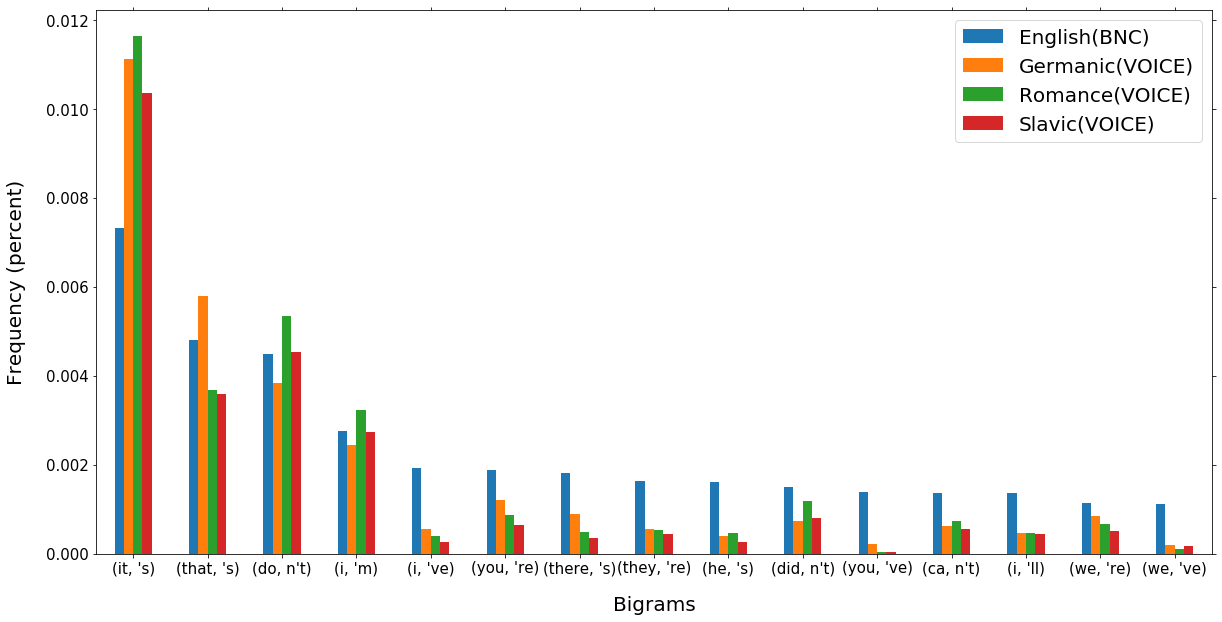

,English(BNC),Germanic(VOICE),Romance(VOICE),Slavic(VOICE)
"(it, 's)",0.00732095,0.0111299,0.0116396,0.0103653
"(that, 's)",0.0048141,0.00579272,0.00367629,0.00358305
"(do, n't)",0.00450116,0.00383028,0.00534955,0.00453366
"(i, 'm)",0.0027683,0.00245656,0.0032366,0.00274213
"(i, 've)",0.00193566,0.000546682,0.000403049,0.000274213
"(you, 're)",0.00188097,0.00121952,0.000879379,0.00063983
"(there, 's)",0.00181081,0.000904127,0.000488544,0.000365617
"(they, 're)",0.0016304,0.000567708,0.000537398,0.000438741
"(he, 's)",0.00162229,0.000392489,0.000464116,0.000255932
"(did, n't)",0.00149552,0.000735918,0.00118472,0.000804358


In [81]:
bigrams_df.plot(kind='bar', figsize=(20,10))
plt.tick_params(axis = 'both', reset=True, labelsize=15)
plt.legend(prop={'size':20})
plt.xlabel("Bigrams", fontsize= 20, labelpad = 20)
plt.ylabel("Frequency (percent)", fontsize= 20, labelpad = 20)
plt.show()

bigrams_df